<a href="https://colab.research.google.com/github/Rivalll-09/SIG/blob/main/SIG_A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import geopandas as gpd
from geopandas import datasets, read_file, geodataframe
import matplotlib.pyplot as plt


Import File

In [6]:
zipfile = "lsm.zip"
kota = gpd.read_file(zipfile)

Melihat Peta

In [ ]:
kota.head()

,KDPPUM,NAMOBJ,REMARK,KDPBPS,FCODE,LUASWH,UUPP,SRS_ID,LCODE,METADATA,KDEBPS,KDEPUM,KDCBPS,KDCPUM,KDBBPS,KDBPUM,WADMKD,WIADKD,WADMKC,WIADKC,WADMKK,WIADKK,WADMPR,WIADPR,TIPADM,SHAPE_Leng,SHAPE_Area,geometry
0,None,BANDASAKTI,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.162595,0.000888,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13327..."
1,None,BLANGMANGAT,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.474378,0.003945,"POLYGON Z ((97.09851 5.16797 0.00000, 97.09845..."
2,None,MUARA DUA,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.298543,0.002193,"POLYGON Z ((97.13359 5.17511 0.00000, 97.13349..."
3,None,MUARA SATU,Wilayah Administrasi Kecamatan,None,None,0.0,None,None,BA0080,None,None,None,None,None,None,None,None,None,None,None,LHOKSEUMAWE,None,ACEH,None,0,0.377833,0.004098,"POLYGON Z ((97.11641 5.21582 0.00000, 97.11612..."


<Axes: >

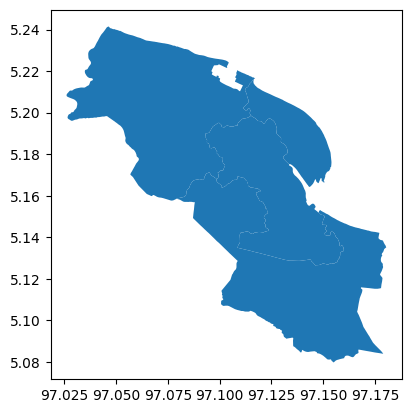

In [ ]:
kota.plot()

Menampilkan Arsiran Peta

<Axes: >

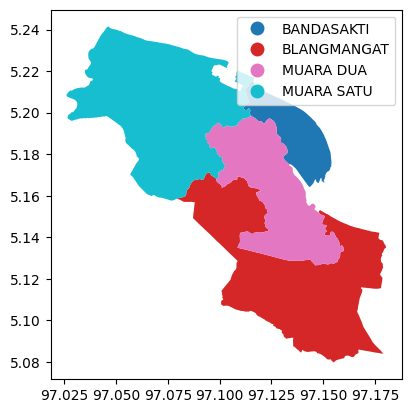

In [ ]:
kota.plot(column='NAMOBJ', legend=True)

Me

<Axes: >

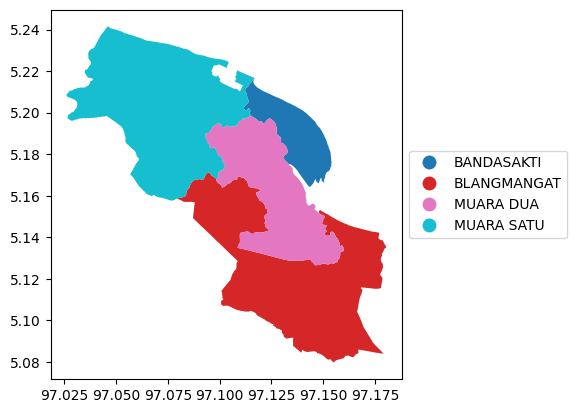

In [ ]:
kota.plot(column='NAMOBJ', legend=True, legend_kwds={"loc": "center left", "bbox_to_anchor": (1, 0.5)},)

In [7]:
filename = "lsmjson.geojson"
file = open(filename)
df = gpd.read_file(file)


<Axes: >

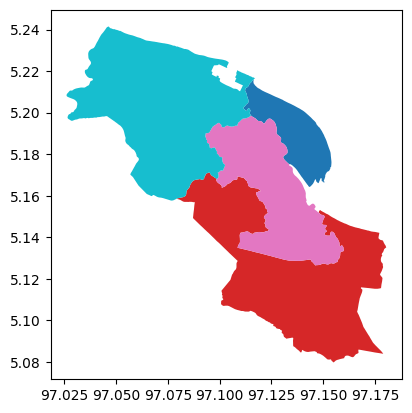

In [8]:
df.plot(column="NAMOBJ")

In [13]:
pip install mapclassify

In [14]:
import mapclassify
df.explore()

In [15]:
kota.explore(
    column="NAMOBJ",  # make choropleth based on "BoroName" column
    tooltip="NAMOBJ",  # show "BoroName" value in tooltip (on hover)
    popup=True,  # show all values in popup (on click)
    tiles="CartoDB positron",  # use "CartoDB positron" tiles
    cmap="Set1",  # use "Set1" matplotlib colormap
    style_kwds=dict(color="black"),  # use black outline
)

In [17]:
import folium
m = kota.explore(
    column="NAMOBJ",  # make choropleth based on "POP2010" column
    scheme="naturalbreaks",  # use mapclassify's natural breaks scheme
    legend=True,  # show legend
    k=10,  # use 10 bins
    tooltip=False,  # hide tooltip
    popup=["NAMOBJ", "NAMOBJ"],  # show popup (on-click)
    legend_kwds=dict(colorbar=False),  # do not use colorbar
    name="NAMOBJ",  # name of the layer in the map
)
kota.explore(
    m=m,  # pass the map object
    color="red",  # use red color on all points
    marker_kwds=dict(radius=5, fill=True),  # make marker radius 10px with fill
    tooltip="NAMOBJ",  # show "name" column in the tooltip
    tooltip_kwds=dict(labels=False),  # do not show column label in the tooltip
    name="NAMOBJ",  # name of the layer in the map
)
folium.TileLayer("CartoDB positron", show=False).add_to(
    m
)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control
m  # show map